In [2]:
#Import required module(s):
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [3]:
#Download the iris dataset.
iris = sns.load_dataset('iris')

In [4]:
#Create a feature matrix from features from iris dataset.
X_iris = iris.drop('species', axis = 1) #Create feature matrix (X).

In [5]:
#Instantiate model with hyperparameters.
model = PCA(n_components = 2)

In [6]:
#Fit model to data.
model.fit(X_iris)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
#Transform the data from four to two (lower) dimensions.
X_2D = model.transform(X_iris)

In [8]:
#Add results back to the original dataframe.
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

In [9]:
#Instantiate model with hyperparameters.
modelGM = GaussianMixture(n_components = 3, covariance_type = 'full')

In [10]:
#Fit model to data.
modelGM.fit(X_iris)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
#Determine cluster labels.
y_gmm = modelGM.predict(X_iris)

In [12]:
#Add cluster data to the original dataframe.
iris['cluster'] = y_gmm

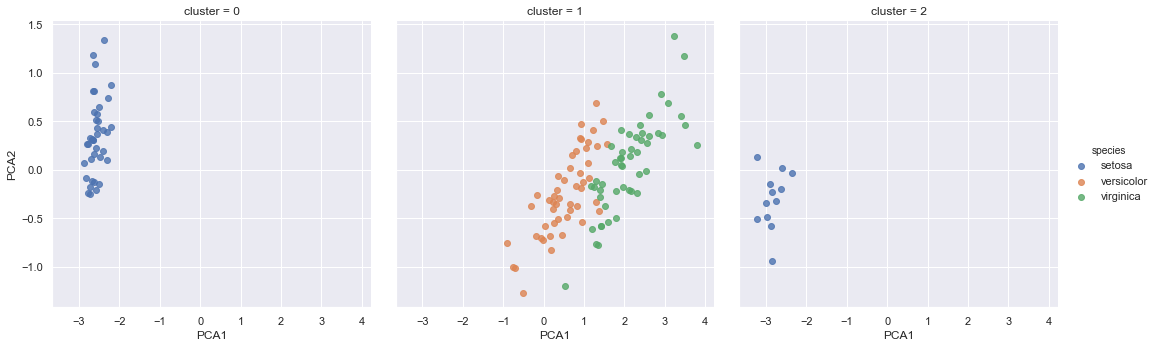

In [13]:
#Create visual for the data.
sns.lmplot("PCA1", "PCA2", data = iris, hue = 'species', col = 'cluster', fit_reg = False);